<a href="https://colab.research.google.com/github/ClaudioCaniullan/Machine-Learning-Naive-Bayes-Aplicaciones/blob/main/Naive_Bayes_Breast_Cancer_Ejemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OBJETIVO**: Realizar una predicción con el set de datos de Breast Cancer usando el algoritmo Naive Bayes.

**Estructura del programa**

- Importar librerías
- Seleccionar el dataset
- Explorar los Datos
- Dividir los datos para training y test (70%/30% o 80%/20%)
- Predecir con el clasificador seleccionado

**Herramientas**  

- DataSets: Breast Cancer
- Algoritmo: Naive Bayes 
    - sklearn.naive_bayes.GaussianNB(*, priors=None, var_smoothing=1e-09)
- Medidor del Clasificador: Matriz de Confusión 
- Función Split para dividir la data en set de Training y Test




**ALGORITMO NAIVE BAYES Y SUS PARÁMETROS**

**sklearn.naive_bayes.GaussianNB(*, priors=None, var_smoothing=1e-09)**

- priors: array-like of shape (n_classes,)
Probabilidades previas de las clases. Si se especifica, los antecedentes no se ajustan de acuerdo con los datos.

- var_smoothing: float, predeterminado = 1e-9
Porción de la variación más grande de todas las características que se agrega a las variaciones para la estabilidad del cálculo.


In [ ]:
# Importar librerías y métodos
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [ ]:
# Guardar Breast Cancer en dataset
dataset = datasets.load_breast_cancer()

In [14]:
# Verificar las dimensiones contenidas en el dataset
print('Información en el dataset:')
print(dataset.keys())

Información en el dataset:
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [15]:
# Verificar las características del dataset
print('Características del dataset:')
print(dataset.DESCR)

Características del dataset:
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instan

**Seleccionamos todas las columnas**
    
    X = dataset.data

**Defino los datos correspondientes a las etiquetas**

    y = dataset.target
    


In [16]:
# Seleccionar todas las columnas
X = dataset.data

# Definir los datos correspondientes a las etiquetas
y = dataset.target

In [17]:
# Verificar las características del dataset X
print(dataset.data)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [18]:
# Verificar el target y 
print(dataset.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [19]:
# Separar los datos en "train" y "test" para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Definir Naive Bayes como "algoritmo"
algoritmo = GaussianNB()

# Entrenar el modelo (Fit)
algoritmo.fit(X_train, y_train)

# Realizar la predicción
y_pred = algoritmo.predict(X_test)

print(X_test)
#sujeto50=dataset.data[50]
#print(sujeto50)
#algoritmo.predict(sujeto50)"""

[[1.403e+01 2.125e+01 8.979e+01 ... 7.963e-02 2.226e-01 7.617e-02]
 [1.147e+01 1.603e+01 7.302e+01 ... 6.548e-02 2.851e-01 8.763e-02]
 [1.104e+01 1.493e+01 7.067e+01 ... 6.754e-02 3.202e-01 7.287e-02]
 ...
 [1.300e+01 2.182e+01 8.750e+01 ... 2.060e-01 4.378e-01 1.072e-01]
 [1.337e+01 1.639e+01 8.610e+01 ... 8.978e-02 2.048e-01 7.628e-02]
 [1.350e+01 1.271e+01 8.569e+01 ... 2.210e-02 2.267e-01 6.192e-02]]


![image.png](attachment:image.png)

![image.png](attachment:image.png)

Matriz de Confusión:
[[39  5]
 [ 1 69]]


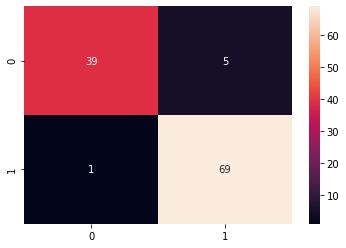

In [25]:
# Generar y analizar la matriz de Confusión
import seaborn as sn
import matplotlib.pyplot as plt

matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

sn.heatmap(matriz, annot=True)
plt.show()


In [27]:
# Exactitud(accuracy): mide el porcentaje de casos que el modelo ha acertado
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9473684210526315

In [28]:
# Precision: mide la calidad del modelo de machine learning en tareas de clasificación.
# Responde a la pregunta ¿qué porcentaje de lo identificado como positivo es realmente correcto?
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='micro')

0.9473684210526315

In [29]:
# Rendimiento combinado de la precisión y la sensibilidad  
from sklearn.metrics import f1_score 
f1_score(y_test, y_pred, average='micro')

0.9473684210526315

In [30]:
# Sensibilidad(Recall) - ¿Qué porcentaje de los valores positivos fueron bien identificados?
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='micro')

0.9473684210526315